In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\sonia\Downloads\perrin-freres-monthly-champagne-.csv")

In [9]:
data

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [89]:
data.shape

(105, 1)

In [11]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
data.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [13]:
## Cleaning up the data
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [19]:
## Drop last 2 rows
data.drop(106,axis=0,inplace=True)

In [21]:
data.drop(105,axis=0,inplace=True)

In [23]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [27]:
# Convert Month into Datetime
data['Month']=pd.to_datetime(data['Month'])

In [29]:
data.set_index('Month',inplace=True)

In [31]:
data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [35]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Step 2: Visualize the Data


<Axes: xlabel='Month'>

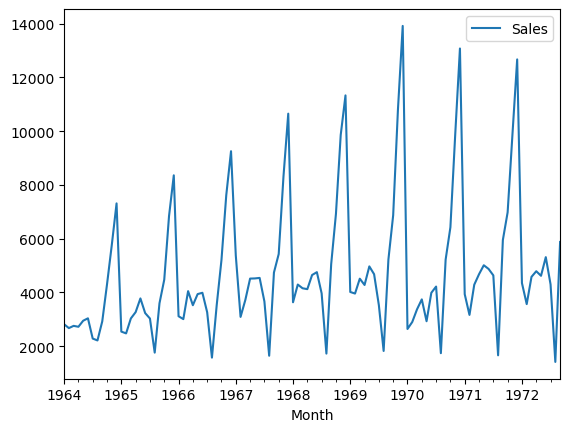

In [38]:
## BY observing data is not stationary,data looks seasonal

data.plot()

In [40]:
### Testing whether data is  Stationarity or not
## adfuller test is hypothesis testing where it says as 
## H0:it is not stationary,H1 -it is stationary if my p value is <=0.05 then we are rejecting the H0 

from statsmodels.tsa.stattools import adfuller

In [52]:
## labels=['ADF Test statistics','P-value','Lags used','Number of observations used']

adfuller_result= adfuller(data['Sales'])
adfuller_result

(-1.8335930563276204,
 0.3639157716602462,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

p-value: 0.3639157716602462
the time series is not stsationary

Now we have to convert the non stationary data to stationary data

# Differencing

In [83]:
## differencing:we shift one position of the sales means one record will move down and first record value is set to Nan
## As the given data is seasonal we will shift the data by 12
#3 we need to drop all the null first before perform ad-fuller test

diff= data['Sales']- data['Sales'].shift(12)
diff.dropna(inplace=True)

#Applying ADF Test
adfuller_result = adfuller(diff)
print('p-value:', adfuller_result[1])

p-value: 2.060579696813685e-11


the time series is stationary



# Step-4 Plot ACF/PACF and find p,d,q parameters

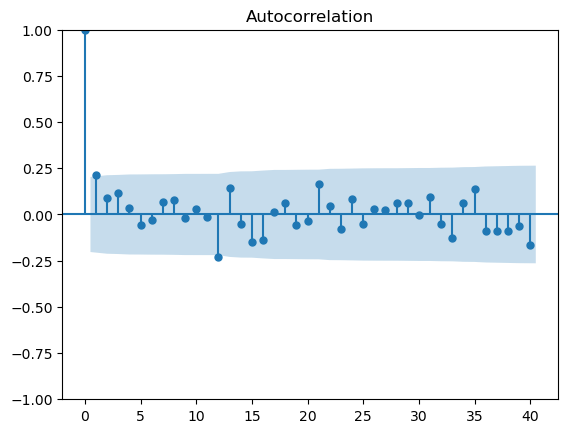

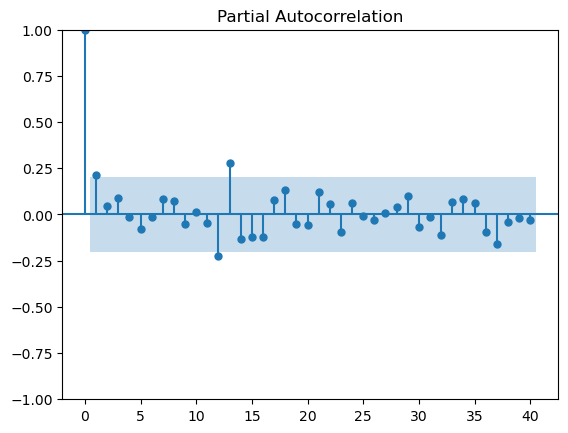

In [87]:
## now we have to use auto correlation and partial auto correlation
## arima have ACF ,different,moving average
## in arima we need to give 3 values p,q,d p=ar model lags,d=differencing,q=moving average lags
## ar model is best done with pacf,(AR)p value is considered as shutoff means sudden drop off (sudeen drop of values) values,
## q value is my MA value which often done best with ACF rather than PACF, PACF Value does not shut off(slow drop down of values),but instead tapers towards 0 in same manner
## p value is 1 where as q value is either 0 0r 1 we need try with both and d=1

from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)


In [93]:
data.shape

(105, 1)

# Train-Test Split

In [96]:
y_train = diff[:80]
y_test = diff[80:]

# Build ARIMA MODEL

In [117]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(diff, order=(1,1,1))
ARIMA= model.fit()

C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
ypred_test= ARIMA.predict(start=y_test.index[0],end =y_test.index[-1])
ypred_train= ARIMA.predict(start=y_train.index[0],end =y_train.index[-1])

In [121]:
from sklearn.metrics import r2_score
print("Train_R2", r2_score(ypred_train,y_train))
print("Test_R2", r2_score(ypred_test,y_test))

Train_R2 -0.2070500814671512
Test_R2 -0.43770628544034684


In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(diff, seasonal_order=(1,1,1,12))
SARIMA= model.fit()

C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [180]:
ypred_test= SARIMA.predict(start=y_test.index[0],end =y_test.index[-1])
ypred_train= SARIMA.predict(start=y_train.index[0],end =y_train.index[-1])

In [182]:
from sklearn.metrics import r2_score
print("Train_R2", r2_score(ypred_train,y_train))
print("Test_R2", r2_score(ypred_test,y_test))

Train_R2 -1.7341550642304466
Test_R2 -0.3685076751611731
